## 1. Importing Libraries


In [117]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import learning_curve
import numpy as np

## 2. Loading and Exploring the Data

In [91]:
df = pd.read_csv('data/fake_bills.csv', sep=';')

In [92]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


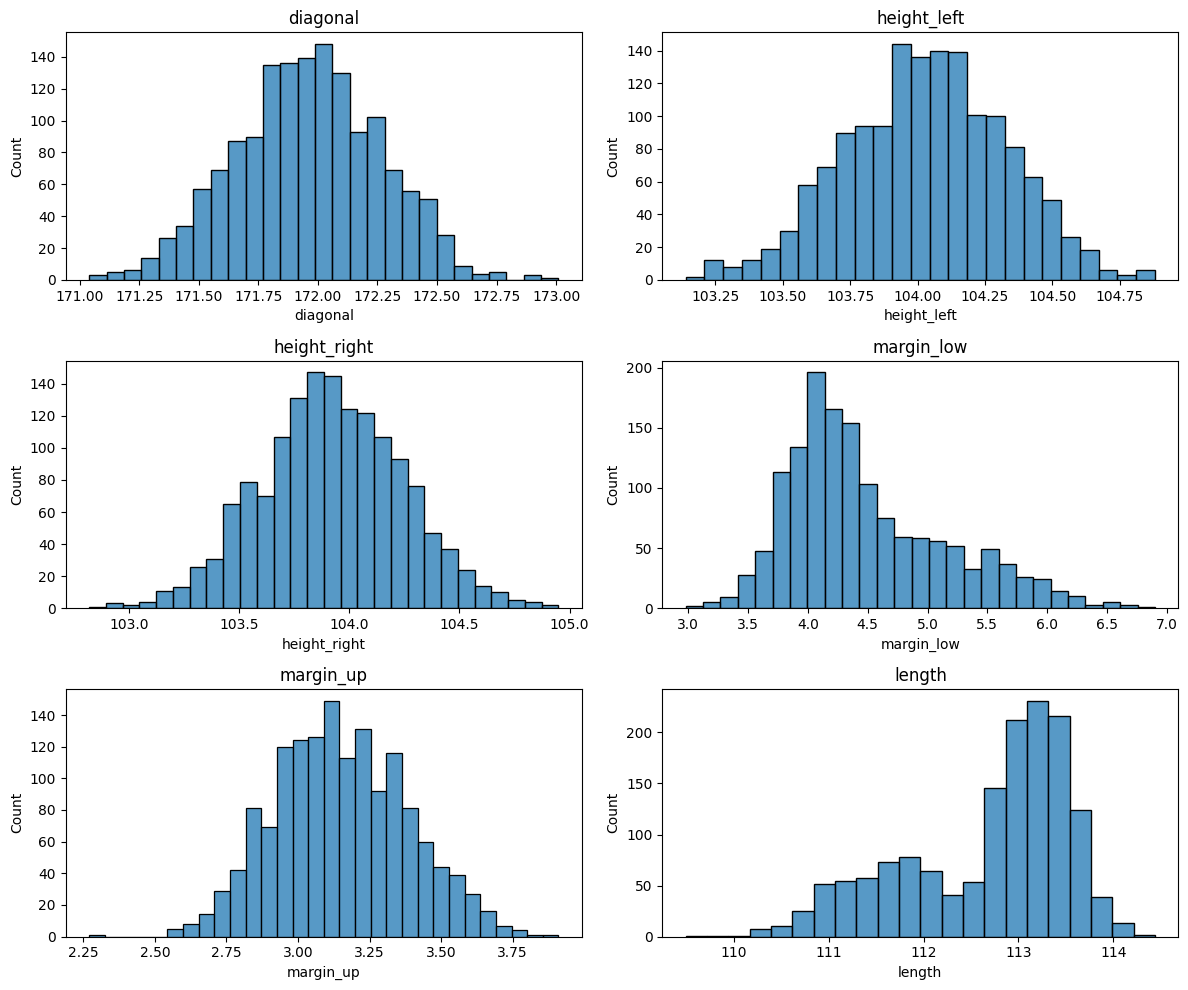

In [94]:
columnas = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
plt.figure(figsize=(12, 10))

for i, col in enumerate(columnas, 1):
    plt.subplot(len(columnas) // 2 + len(columnas) % 2, 2, i)
    sns.histplot(df[col].dropna(), kde=False)
    plt.title(col)

plt.tight_layout()
plt.show()

## 3. Data Cleaning and Preparation

In [95]:
iterimp = IterativeImputer()

df_impute = pd.DataFrame(iterimp.fit_transform(df), columns=df.columns)

## 4. Scaling or Normalizing Data


## 5. Model Building and Training


### Split data into train and test

In [96]:
df.dropna(inplace=True)
x_train_1, x_test_1,y_train_1, y_test_1 = train_test_split(df.drop(columns='is_genuine'), df['is_genuine'])

In [97]:
x_train_2, x_test_2,y_train_2, y_test_2 = train_test_split(df_impute.drop(columns='is_genuine'), df_impute['is_genuine'])

### Functions

In [98]:
list_report = []
def report_model(model, predictions,y_test):
    model_name = f"{model.__class__.__name__} - {model.__getattribute__('solver')} - {model.__getattribute__('class_weight')}"
    print(model_name)
    
    accuracy = accuracy_score(y_test, predictions)
    f1score = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    
    list_report.append([ model_name,accuracy, f1score, precision,recall])
    
    print(classification_report(y_test, predictions))

In [99]:
def generate_matrix_confusion(model, predictions, y_test):
    cm = confusion_matrix(y_test,predictions)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predict Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix - {model.__class__.__name__} - {model.__getattribute__('solver')} - {model.__getattribute__('class_weight')}")
    plt.show()

In [120]:
def learning_curve_plot(log_reg, x_test, y_test):
    
    train_sizes, train_scores, test_scores = learning_curve(log_reg, x_test, y_test, cv=5, n_jobs=-1)

    # Calcular medias y desviaciones estándar
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, train_mean, label="Training", color="blue")
    plt.plot(train_sizes, test_mean, label="Validation", color="green")
    plt.xlabel('Train Set Size')
    plt.ylabel('Precision')
    plt.legend(loc="best")
    plt.title("Learning Curve")
    plt.show()

### solver: newton-cg | class_weight: balanced

In [100]:
log_reg_3= LogisticRegression(solver='newton-cg',class_weight='balanced')
log_reg_3.fit(x_train_1, y_train_1)

predictions_3 = log_reg_3.predict(x_test_1)

In [101]:
report_model(log_reg_3, predictions_3, y_test_1)

LogisticRegression - newton-cg - balanced
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       128
        True       0.99      1.00      0.99       238

    accuracy                           0.99       366
   macro avg       0.99      0.99      0.99       366
weighted avg       0.99      0.99      0.99       366



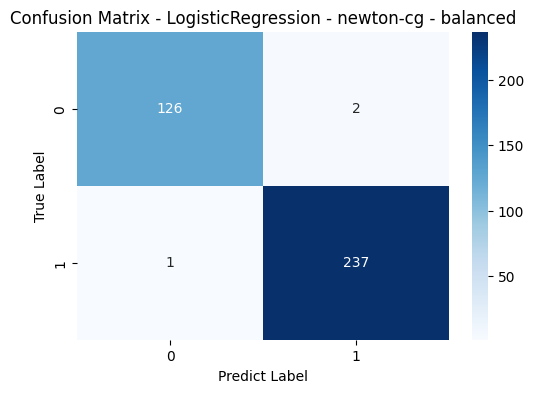

In [102]:
generate_matrix_confusion(log_reg_3, predictions_3, y_test_1)

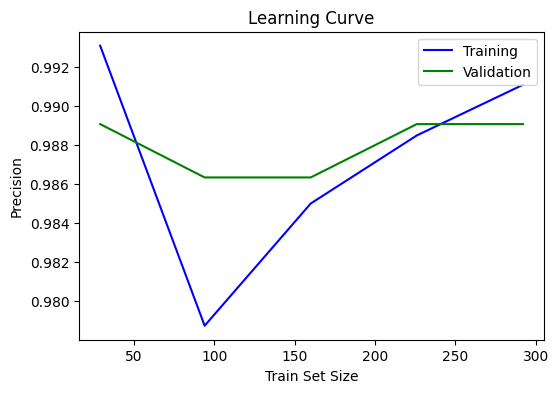

In [121]:
learning_curve_plot(log_reg_3, x_test_1, y_test_1)

### solver: newton-cg

In [103]:
log_reg_4 = LogisticRegression(solver='newton-cg')
log_reg_4.fit(x_train_1, y_train_1)

predictions_4 = log_reg_4.predict(x_test_1)

In [104]:
report_model(log_reg_4, predictions_4, y_test_1)

LogisticRegression - newton-cg - None
              precision    recall  f1-score   support

       False       1.00      0.98      0.99       128
        True       0.99      1.00      0.99       238

    accuracy                           0.99       366
   macro avg       0.99      0.99      0.99       366
weighted avg       0.99      0.99      0.99       366



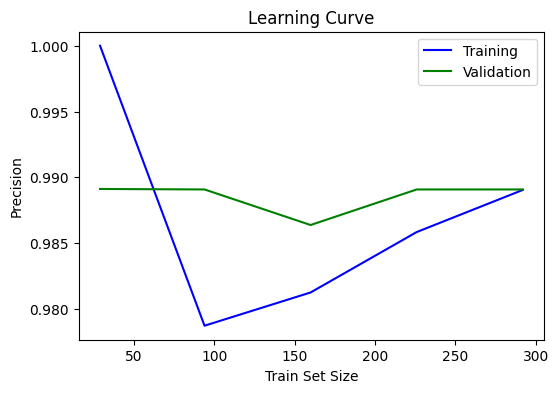

In [122]:
learning_curve_plot(log_reg_4, x_test_1, y_test_1)

### solver: newton-cg | class_weight: balanced with imputer

In [106]:
log_reg_1 = LogisticRegression(solver='newton-cg',class_weight='balanced')
log_reg_1.fit(x_train_2, y_train_2)

predictions_1 = log_reg_1.predict(x_test_2)

In [107]:
report_model(log_reg_1, predictions_1, y_test_2)

LogisticRegression - newton-cg - balanced
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       132
         1.0       1.00      1.00      1.00       243

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



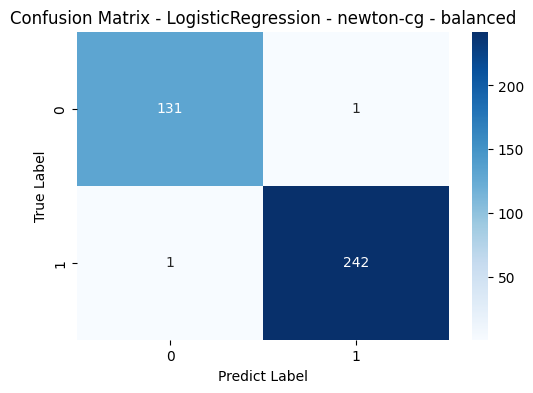

In [108]:
generate_matrix_confusion(log_reg_1, predictions_1, y_test_2)

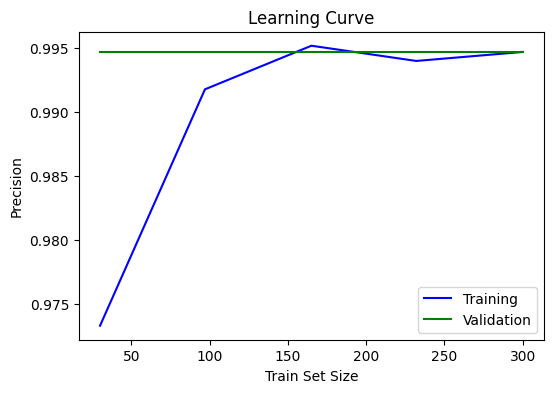

In [123]:
learning_curve_plot(log_reg_1, x_test_2, y_test_2)

### solver: newton-cg with emputer

In [109]:
log_reg_2 = LogisticRegression(solver='newton-cg')
log_reg_2.fit(x_train_2, y_train_2)

predictions_2 = log_reg_2.predict(x_test_2)

In [110]:
report_model(log_reg_2, predictions_2, y_test_2)

LogisticRegression - newton-cg - None
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       132
         1.0       1.00      1.00      1.00       243

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



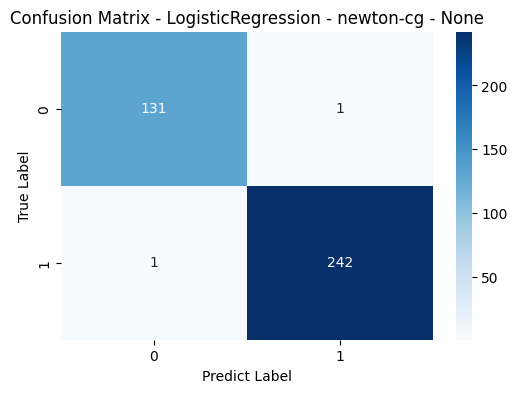

In [111]:
generate_matrix_confusion(log_reg_2, predictions_2,y_test_2)

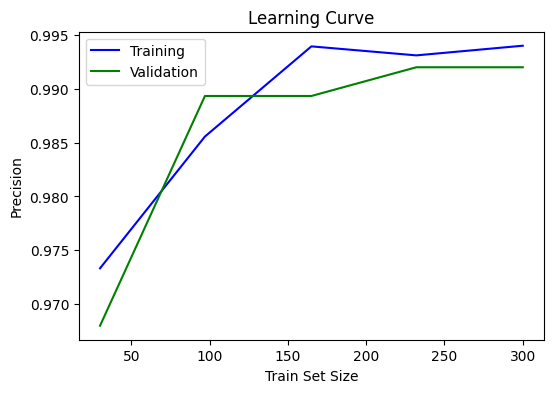

In [124]:
learning_curve_plot(log_reg_2, x_test_2, y_test_2)

## 6. Model Evaluation

The results from the logistic regression models demonstrate outstanding performance in both configurations of data handling. 

In the first series of tests (models 0 and 1), where rows with missing data were eliminated, high performance metrics were achieved, with an accuracy of **99.18%** and an F1 score above **0.99** in both cases. Precision was notably high in model 0, reaching **99.16%**, while recall in model 1 reached **100%**, indicating that all true positives were identified, albeit at the cost of a slight decrease in precision.

In the second series of tests (models 2 and 3), which employed *Iterative Imputer* to handle missing values, even higher performance metrics were observed. Both models achieved an accuracy of **99.47%** and an F1 score of **0.995885**, suggesting that imputing missing data instead of eliminating it resulted in a better balance between precision and recall while maintaining overall high performance.

In summary, the models using *Iterative Imputer* (models 2 and 3) slightly outperformed the models that eliminated rows with missing data (models 0 and 1). This suggests that imputing missing data can be a more effective strategy in this context, as it not only preserves more data for analysis but also improves evaluation metrics, particularly in terms of precision and overall model balance.

When using Iterative Imputer to handle missing values, it was observed that the learning curves tend to converge, indicating a favorable performance of the model in both cases evaluated. In the first situation, the validation curve is slightly above the training curve, suggesting a good generalization capacity of the model, although with a slight margin of improvement in the fit to the training set. In the second case, the training curve is above the validation curve, but both follow a convergent trajectory. This indicates that, despite a stronger initial fit in training, the model manages to balance its performance, showing a reasonable ability to generalize without falling into significant overfitting. In summary, the use of Iterative Imputer contributed to a positive convergence in the learning curves, suggesting an effective approach to the treatment of missing data and a solid performance of the model.

In [112]:
pd.DataFrame(list_report,columns=['model','accuracy','f1_score','precision','recall'])

,model,accuracy,f1_score,precision,recall
0,LogisticRegression - newton-cg - balanced,0.991803,0.993711,0.991632,0.995798
1,LogisticRegression - newton-cg - None,0.991803,0.993737,0.987552,1.000000
2,LogisticRegression - newton-cg - balanced,0.994667,0.995885,0.995885,0.995885
3,LogisticRegression - newton-cg - None,0.994667,0.995885,0.995885,0.995885
